# Atentados terroristas: Evidencias del estudio de eventos en el mercado de las criptomonedas  
### title: "TFM_AnalisisEventos"
### author: "Enrique Calleja Hoyos"
### date: "20/8/2020"


## eventstudy python package
Event Study package is an open-source python project created to facilitate the computation of financial
event study analyses.


In [1]:
#Instalamos el paquete
#!pip install eventstudy


In [1]:
#Importamos las librerias necesarias
import eventstudy as es
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as st
import scipy as spy
from eventstudy import excelExporter

En primer lugar, será necesario cargar el fichero .csv con el histórico de la cotización tanto de las criptomonedas como del índice de mercado seleccionado. Para ello, reutilizaremos el dataset creado previamente en el notebook de Jupyter *CoinMarketCap_scraping.ipyng" . El archivo contendrá un listado con el precio de cierre diario para cada uno de los elementos, por ello a la hora de importarlo especificamos "is_price=True", ya que de esta forma se calcularán los retornos a partir de los precios del fichero. Con "log_return" indicamos que los retornos se calculen utilizando el logaritmo.

In [47]:
es.Single.import_returns('prices4python2.csv',is_price=True,log_return=True)

En primer lugar probamos la libreria analizando el efecto de un único evento sobre una única criptomoneda, en este caso el bitcoin.

In [48]:
event = es.Single.market_model(
security_ticker = 'bitcoin',
market_ticker='CCI30',
event_date = np.datetime64('2015-11-17'),
event_window = (0,+2),
estimation_size = 120,
buffer_size = 2
)

Dibujamos el resultado:

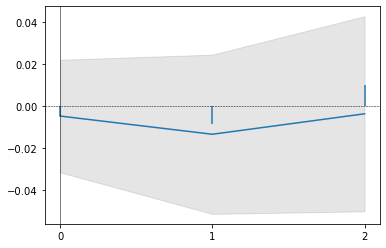

In [49]:
event.plot(AR=True,confidence=.95)
plt.show()

Las líneas verticales representan los AR, la línea azul representa los CAR, y el área gris es el intervalo de confianza (aquí al 95%).
Ahora veamos los resultados en una tabla:

In [50]:
event.results(decimals=[3,5,3,5,2,3])
#Guardamos el resultado en Excel
#event.results(decimals=[3,5,3,5,2,3]).to_excel('preba.xlsx')

AR  Std. E. AR     CAR  Std. E. CAR  T-stat  P-value
0 -0.005     0.01615  -0.005      0.01615   -0.30    0.383
1 -0.009     0.01615  -0.013      0.02283   -0.59    0.278
2  0.010     0.01615  -0.004      0.02796   -0.13    0.447

Note: Asterisks are added automatically to highlight the level of significance (Significance level: *** at
99%, ** at 95%, * at 90%). 

A la vista de que funciona correctamente, ahora nos centraremos en realizar nuestro análisis.
## Análisis del dataset de eventos terroristas

the market model needs:
- the security_ticker (identificador único de la criptomoneda)
- the market_ticker (identificador único del índice de mercado seleccionado)
- and the event_date parameters (fecha de acaecimiento del evento)

 Thus, the csv file (eventos4python.csv) should contain three columns with the exact same names as the parameter names.
Basically, Multiple class takes in input a list of single event studies (eventstudy.Single), aggregate them and
gives access to aggregate statistics and tests (All single event studies must have the same specifications (event, estimation and buffer windows).

In [51]:
study_atentados = es.Multiple.from_csv(
    path = 'eventos4python.csv', # the path to the csv file created
    event_study_model = es.Single.market_model,
    event_window = (0,+3),
    estimation_size = 120,
    buffer_size = 1,
    date_format = '%Y-%m-%d',
    keep_model=True,
    ignore_errors = True
)

Tips: Get more details on errors by calling EventStudyBatch.error_report() method or by exploring EventStudyBatch.errors class variable.


Veamos por que se han producido los errores.

In [52]:
print(study_atentados.error_report())

Error Report

5 errors due to data unavailability.
The respective events was not processed and thus removed from the sample.
It does not affect the computation of other events.

Help 1: Check if the company was quoted at this date, 
Help 2: For event study modelised used Fama-French models,
        check if the Fama-French dataset imported is up-to-date.
Tips:   Re-import all parameters and re-run the event study analysis.

Details
(You can find more details on errors in the documentation.)

Error            Date                       Parameters                                   
---------------- -------------------------- -----------------------------------------------
DataMissingError 2019-11-29T00:00:00.000000 security_ticker: bitcoin; market_ticker: CCI30 
Description: Some data are missing for (bitcoin) in 'returns''.

DataMissingError 2019-11-29T00:00:00.000000 security_ticker: xrp; market_ticker: CCI30     
Description: Some data are missing for (xrp) in 'returns''.

DataMissing

No se han podido incluir en el estudio los eventos acaecidos el por falta de datos en el periodo de estimación:
- 29/11/2019: Atentado en el puente de Londres

A pesar de ello, el estudio de eventos se completa con la excepción de que no se consideran los 2 eventos arriba indicados.


Dibujamos el resultado por pantalla utilizando la función plot():

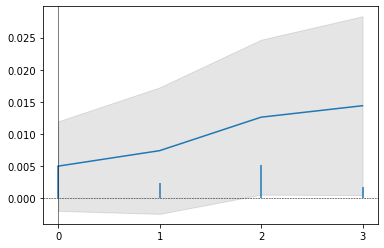

In [53]:
study_atentados.plot(AAR=True,confidence=.9)
plt.show()

Las líneas verticales representan los AR, la línea azul representa los CAR, y el área gris es el intervalo de confianza (aquí al 95%).
Ahora veamos los resultados en una tabla:

In [54]:
study_atentados.results(asterisks=True, decimals=3)

AAR  Std. E. AAR     CAAR  Std. E. CAAR  T-stat  P-value
0  0.005        0.005    0.005         0.005   0.923    0.178
1  0.002        0.005    0.007         0.008   0.966    0.167
2  0.005        0.005  0.013 *         0.009   1.342    0.090
3  0.002        0.005  0.014 *         0.011   1.327    0.092

The function returns AAR and AAR’s variance, CAAR and CAAR’s variance, T-stat and P-value, for each T
in the event window

## Significance tests

Generally, significance tests can be grouped in parametric and nonparametric tests (NPTs). Parametric tests assume that individual firm's abnormal returns are normally distributed, whereas nonparametric tests do not rely on any such assumptions. In research, scholars commonly complement a parametric test with a nonparametric tests to verify that the research findings are not due to eg. an outlier
sign_test() functio is not implemented yer, according with the documentatios of the package, so, we just get CARs’ descriptive statistics of a market model event study on an aggregate of events, in order to see if they are normally distributed.

In [55]:
study_atentados.get_CAR_dist(3)

Mean  Variance  Kurtosis  Skewness    Min  Quantile 25%  Quantile 50%  \
0  0.005     0.001    11.028     2.774 -0.065        -0.009        -0.000   
1  0.007     0.002     5.307     1.569 -0.100        -0.007         0.001   
2  0.013     0.004     5.860     0.318 -0.237        -0.013        -0.000   
3  0.014     0.006     6.202     1.427 -0.234        -0.022        -0.000   

   Quantile 75%    Max  
0         0.007  0.204  
1         0.019  0.194  
2         0.040  0.272  
3         0.045  0.346

### Estudio de evento firma a firma

Leemos el archivo csv utilizado anteriormente como un dataframe, para terminar conviertiendolo en una lista de diccionarios, que le pasaremos al método Multiple.from_list() para ejecutar el estudio de eventos a nivel individual de criptomoneda.

In [56]:
from collections import OrderedDict
event_df=pd.read_csv('eventos4python.csv',sep=',')

In [57]:
event_df.head()

security_ticker market_ticker  event_date
0         bitcoin         CCI30  2015-11-13
1         bitcoin         CCI30  2015-12-02
2         bitcoin         CCI30  2016-03-22
3         bitcoin         CCI30  2016-06-12
4         bitcoin         CCI30  2016-06-28

Cambiamos el formato de la columna *event_date" para que coincida con el formato esperado por la función Multiple.from_list().

In [58]:
event_df['event_date']=pd.to_datetime(event_df['event_date'])
#event_df['event_date']=np.datetime64(event_df['event_date'])
#event_df['event_date'].dtype


In [59]:
events_db = event_df.to_dict('records')


Nos aseguramos de que la lista tiene el formato deseado:

In [60]:
events_db

[{'security_ticker': 'bitcoin',
  'market_ticker': 'CCI30',
  'event_date': Timestamp('2015-11-13 00:00:00')},
 {'security_ticker': 'bitcoin',
  'market_ticker': 'CCI30',
  'event_date': Timestamp('2015-12-02 00:00:00')},
 {'security_ticker': 'bitcoin',
  'market_ticker': 'CCI30',
  'event_date': Timestamp('2016-03-22 00:00:00')},
 {'security_ticker': 'bitcoin',
  'market_ticker': 'CCI30',
  'event_date': Timestamp('2016-06-12 00:00:00')},
 {'security_ticker': 'bitcoin',
  'market_ticker': 'CCI30',
  'event_date': Timestamp('2016-06-28 00:00:00')},
 {'security_ticker': 'bitcoin',
  'market_ticker': 'CCI30',
  'event_date': Timestamp('2016-07-14 00:00:00')},
 {'security_ticker': 'bitcoin',
  'market_ticker': 'CCI30',
  'event_date': Timestamp('2016-12-19 00:00:00')},
 {'security_ticker': 'bitcoin',
  'market_ticker': 'CCI30',
  'event_date': Timestamp('2017-05-22 00:00:00')},
 {'security_ticker': 'bitcoin',
  'market_ticker': 'CCI30',
  'event_date': Timestamp('2017-08-17 00:00:00')},
 

Extraemos el listado de criptomonedas presentes, para recorrerlas una a una.

In [61]:
tickers=event_df['security_ticker'].drop_duplicates().tolist()
tickers

['bitcoin', 'xrp', 'litecoin', 'stellar', 'tether']

Para cada criptomoneda presente en la lista, ejecutamos el estudio de eventos, y presentamos los resultados por pantalla.

In [62]:
releases = dict()

for ticker in tickers:
    events = [event for event in events_db if event['security_ticker']==ticker]
    
    releases[ticker] = es.Multiple.from_list(
        events,
        es.Single.market_model,
        event_window= (0,+3),
        estimation_size = 120,
        buffer_size = 1,
        keep_model=True,
        ignore_errors = True
    )

Tips: Get more details on errors by calling EventStudyBatch.error_report() method or by exploring EventStudyBatch.errors class variable.
Tips: Get more details on errors by calling EventStudyBatch.error_report() method or by exploring EventStudyBatch.errors class variable.
Tips: Get more details on errors by calling EventStudyBatch.error_report() method or by exploring EventStudyBatch.errors class variable.
Tips: Get more details on errors by calling EventStudyBatch.error_report() method or by exploring EventStudyBatch.errors class variable.
Tips: Get more details on errors by calling EventStudyBatch.error_report() method or by exploring EventStudyBatch.errors class variable.


In [63]:
releases['bitcoin'].error_report()

"Error Report\n============\n\nOne error due to data unavailability.\nThe respective events was not processed and thus removed from the sample.\nIt does not affect the computation of other events.\n\nHelp 1: Check if the company was quoted at this date, \nHelp 2: For event study modelised used Fama-French models,\n        check if the Fama-French dataset imported is up-to-date.\nTips:   Re-import all parameters and re-run the event study analysis.\n\nDetails\n=======\n(You can find more details on errors in the documentation.)\n\nError            Date                Parameters                                  \n---------------- ------------------- ----------------------------------------------\nDataMissingError 2019-11-29 00:00:00 security_ticker: bitcoin; market_ticker: CCI30\nDescription: Some data are missing for (bitcoin) in 'returns''.\n---------------- ------------------- ----------------------------------------------"

Nos encontramos con el mismo error señalado anteriormente al realizar el estudio de eventos agregado. N se han podido incluir en el estudio los eventos acaecidos el por falta de datos en el periodo de estimación:
- 29/11/2019: Atentado en el puente de Londres

A pesar de ello, el estudio de eventos se completa con la excepción de que no se consideran los 2 eventos arriba indicados

### Mostramos los resultados

bitcoin


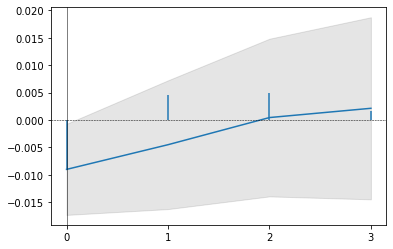

AAR  Std. E. AAR      CAAR  Std. E. CAAR  T-stat  P-value
0 -0.009        0.006  -0.009 *         0.006  -1.391    0.082
1  0.005        0.006    -0.005         0.009  -0.492    0.311
2  0.005        0.006       0.0         0.011   0.039    0.484
3  0.002        0.006     0.002         0.013   0.165    0.435

Mean  Variance  Kurtosis  Skewness    Min  Quantile 25%  Quantile 50%  \
0 -0.009     0.000     1.762    -1.248 -0.065        -0.012        -0.006   
1 -0.005     0.001     1.404    -0.983 -0.100        -0.019        -0.001   
2  0.000     0.002    -0.005    -0.297 -0.108        -0.023        -0.003   
3  0.002     0.003    -0.426     0.097 -0.099        -0.033        -0.003   

   Quantile 75%    Max  
0        -0.000  0.021  
1         0.016  0.048  
2         0.047  0.085  
3         0.044  0.103

xrp


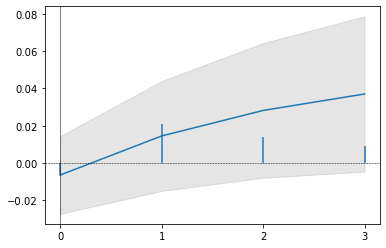

AAR  Std. E. AAR    CAAR  Std. E. CAAR  T-stat  P-value
0 -0.006        0.016  -0.006         0.016  -0.399    0.345
1  0.021        0.016   0.014         0.023   0.630    0.265
2  0.014        0.016   0.028         0.028   1.000    0.159
3  0.009        0.016   0.037         0.033   1.138    0.128

Mean  Variance  Kurtosis  Skewness    Min  Quantile 25%  Quantile 50%  \
0 -0.006     0.001     1.945     1.145 -0.053        -0.025        -0.003   
1  0.014     0.003     4.179     2.086 -0.037        -0.022         0.006   
2  0.028     0.003    -0.132     0.935 -0.039        -0.013         0.014   
3  0.037     0.008     2.417     1.825 -0.037        -0.015        -0.002   

   Quantile 75%    Max  
0         0.005  0.078  
1         0.030  0.177  
2         0.051  0.157  
3         0.047  0.297

litecoin


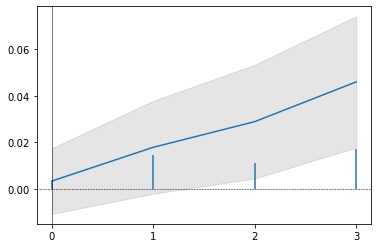

AAR  Std. E. AAR      CAAR  Std. E. CAAR  T-stat  P-value
0  0.003        0.011     0.003         0.011   0.314    0.377
1  0.014        0.011     0.018         0.016   1.155    0.124
2  0.011        0.011   0.029 *         0.019   1.521    0.064
3  0.017        0.011  0.046 **         0.022   2.093    0.018

Mean  Variance  Kurtosis  Skewness    Min  Quantile 25%  Quantile 50%  \
0  0.003     0.001     3.518     1.699 -0.028        -0.004        -0.000   
1  0.018     0.003     4.758     2.168 -0.052        -0.000         0.004   
2  0.029     0.006     4.255     1.914 -0.087        -0.004         0.023   
3  0.046     0.009     4.589     2.079 -0.081         0.004         0.045   

   Quantile 75%    Max  
0         0.007  0.073  
1         0.021  0.194  
2         0.040  0.272  
3         0.056  0.346

stellar


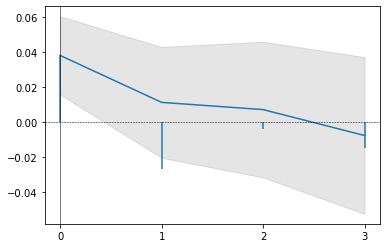

AAR  Std. E. AAR      CAAR  Std. E. CAAR  T-stat  P-value
0  0.038        0.018  0.038 **         0.018   2.176    0.015
1 -0.027        0.018     0.011         0.025   0.453    0.325
2 -0.004        0.018     0.007         0.030   0.234    0.408
3 -0.015        0.018    -0.008         0.035  -0.221    0.412

Mean  Variance  Kurtosis  Skewness    Min  Quantile 25%  Quantile 50%  \
0  0.038     0.004     1.359     1.481 -0.033        -0.002         0.021   
1  0.011     0.004     0.338     0.340 -0.095        -0.037         0.014   
2  0.007     0.008     1.976    -1.301 -0.237        -0.022         0.027   
3 -0.008     0.008     0.667    -0.629 -0.234        -0.050        -0.010   

   Quantile 75%    Max  
0         0.058  0.204  
1         0.044  0.158  
2         0.056  0.143  
3         0.032  0.125

tether


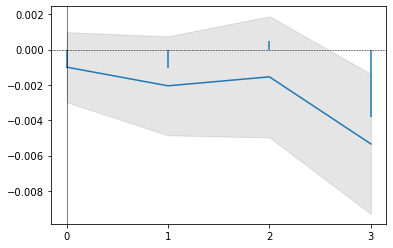

AAR  Std. E. AAR       CAAR  Std. E. CAAR  T-stat  P-value
0 -0.001        0.002     -0.001         0.002  -0.644    0.260
1 -0.001        0.002     -0.002         0.002  -0.940    0.174
2  0.001        0.002     -0.002         0.003  -0.578    0.282
3 -0.004        0.002  -0.005 **         0.003  -1.729    0.042

Mean  Variance  Kurtosis  Skewness    Min  Quantile 25%  Quantile 50%  \
0 -0.001       0.0     0.952    -0.576 -0.010        -0.001          -0.0   
1 -0.002       0.0     4.787    -2.253 -0.020        -0.002          -0.0   
2 -0.002       0.0     1.619    -0.894 -0.016        -0.002          -0.0   
3 -0.005       0.0     6.864    -2.877 -0.054        -0.001          -0.0   

   Quantile 75%    Max  
0          -0.0  0.007  
1          -0.0  0.005  
2          -0.0  0.010  
3          -0.0  0.003

In [64]:
for ticker, event in releases.items():
    print(ticker)
    event.plot(AAR=True,confidence=.90)
    plt.show()
    display(event.results())
    display(event.get_CAR_dist())

Recopilamos en un único dataframe los CAAR obtenidos para cada una de las criptomonedas:

In [66]:
data=pd.DataFrame()
for ticker, event in releases.items():
    #print(ticker)
    data[ticker] = event.results(asterisks=True, decimals=3)['CAAR']
    #display(event.results(asterisks=True, decimals=3)['CAAR'])

In [67]:
data.head()

bitcoin     xrp  litecoin   stellar     tether
0  -0.009 *  -0.006     0.003  0.038 **     -0.001
1    -0.005   0.014     0.018     0.011     -0.002
2       0.0   0.028   0.029 *     0.007     -0.002
3     0.002   0.037  0.046 **    -0.008  -0.005 **

De manera similar a lo realizado con los CAAR, recopilamos los estadísticos más significativos para determinar si la distribución de los CAR es normal.

In [68]:
data_normal=pd.DataFrame()
for ticker, event in releases.items():
    #print(ticker)
    #col1=
    data_normal['Kurtosis-'+ ticker] = event.get_CAR_dist()['Kurtosis']
    data_normal['Skewness-'+ ticker] = event.get_CAR_dist()['Skewness']
    #display(event.results(asterisks=True, decimals=3)['CAAR'])
data_normal.head()

Kurtosis-bitcoin  Skewness-bitcoin  Kurtosis-xrp  Skewness-xrp  \
0             1.762            -1.248         1.945         1.145   
1             1.404            -0.983         4.179         2.086   
2            -0.005            -0.297        -0.132         0.935   
3            -0.426             0.097         2.417         1.825   

   Kurtosis-litecoin  Skewness-litecoin  Kurtosis-stellar  Skewness-stellar  \
0              3.518              1.699             1.359             1.481   
1              4.758              2.168             0.338             0.340   
2              4.255              1.914             1.976            -1.301   
3              4.589              2.079             0.667            -0.629   

   Kurtosis-tether  Skewness-tether  
0            0.952           -0.576  
1            4.787           -2.253  
2            1.619           -0.894  
3            6.864           -2.877

## Repetimos el estudio de eventos agregado, pero excluyendo a la criptodivisa tether

In [71]:
ev2=pd.read_csv('eventos4python.csv')
#Excluimos los eventos del tether del dataset
ev2=ev2[(ev2['security_ticker']!='tether')]
ev2.shape

(56, 3)

Guardamos el dataframe de eventos sin los eventos asociados al tether en un csv que leeremos a continuación a través del método *Multiple.from_csv()*

In [72]:
ev2.to_csv('eventos4python2.csv',index=False)

In [74]:
study_atentados2 = es.Multiple.from_csv(
    path = 'eventos4python2.csv', # the path to the csv file created
    event_study_model = es.Single.market_model,
    event_window = (0,+3),
    estimation_size = 120,
    buffer_size = 1,
    date_format = '%Y-%m-%d',
    keep_model=True,
    ignore_errors = True
)

Tips: Get more details on errors by calling EventStudyBatch.error_report() method or by exploring EventStudyBatch.errors class variable.


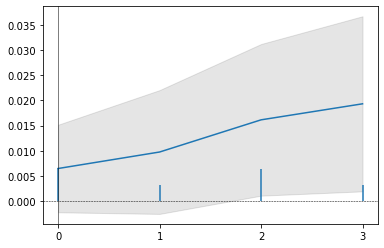

In [75]:
study_atentados2.plot(AAR=True,confidence=.9)
plt.show()

In [76]:
study_atentados2.results(asterisks=True, decimals=3)

AAR  Std. E. AAR     CAAR  Std. E. CAAR  T-stat  P-value
0  0.007        0.007    0.007         0.007   0.961    0.168
1  0.003        0.007     0.01         0.010   1.021    0.154
2  0.006        0.007  0.016 *         0.012   1.377    0.084
3  0.003        0.007  0.019 *         0.014   1.428    0.077

In [77]:
study_atentados2.get_CAR_dist(3)

Mean  Variance  Kurtosis  Skewness    Min  Quantile 25%  Quantile 50%  \
0  0.007     0.002     8.058     2.408 -0.065        -0.011        -0.000   
1  0.010     0.003     3.573     1.301 -0.100        -0.019         0.005   
2  0.016     0.005     4.244     0.145 -0.237        -0.019         0.015   
3  0.019     0.008     4.410     1.161 -0.234        -0.033         0.003   

   Quantile 75%    Max  
0         0.011  0.204  
1         0.031  0.194  
2         0.048  0.272  
3         0.052  0.346